# Introduction to Networkx and Graph Data

You can use NetworkX to construct and draw graphs that are undirected or directed, with weighted or unweighted edges. An array of functions to analyze graphs is available. This tutorial takes you through a few basic examples and exercises.


## Official documentation for version used in this tutorial

https://networkx.github.io/documentation/networkx-2.2/

## Official tutorial for version used in this tutorial

https://networkx.github.io/documentation/networkx-2.2/tutorial.html

Parts of this tutorial were adapted from the material associated with the textbook "A First Course in Network Science" by Filippo Menczer, Santo Fortunato & Clayton A. Davis. You can find the materials for a deeper dive here: https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience and the book here: https://www.cambridge.org/us/universitypress/subjects/physics/statistical-physics/first-course-network-science

In [1]:
# ! pip install networkx

In [1]:
import networkx as nx
%matplotlib inline

In [16]:
import random
random.seed(9001)

# Creating and drawing undirected graphs

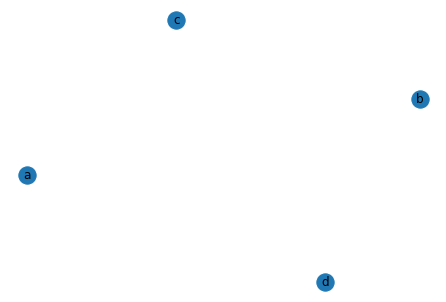

In [19]:
# a "plain" graph is undirected
G = nx.Graph()

# give each a node a 'name', which is a letter in this case.
G.add_node('a')

# the add_nodes_from method allows adding nodes from a sequence, in this case a list
nodes_to_add = ['b', 'c', 'd']
G.add_nodes_from(nodes_to_add)

# draw the graph
nx.draw(G, with_labels=True)

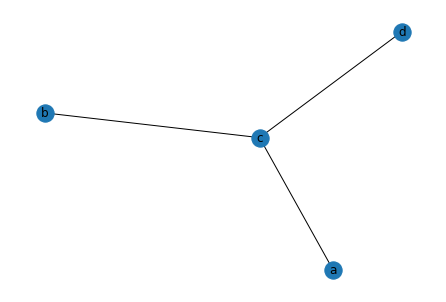

In [65]:
# add edge from 'a' to 'b'
# since this graph is undirected, the order doesn't matter here
G.add_edge('a', 'b')

# just like add_nodes_from, we can add edges from a sequence
# edges should be specified as 2-tuples
edges_to_add = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)

G.remove_edge('b', 'a')

# draw the graph
nx.draw(G, with_labels=True)

There are many optional arguments to the draw function to customize the appearance.

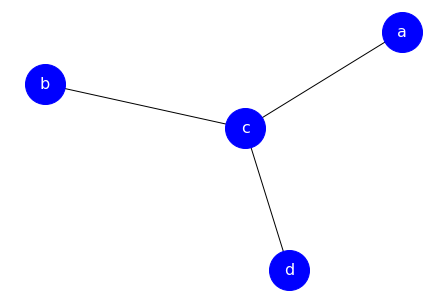

In [66]:
nx.draw(G,
        with_labels=True,
        node_color='blue',
        node_size=1600,
        font_color='white',
        font_size=16,
        )

# Graph methods

The graph object has some properties and methods giving data about the whole graph.

In [22]:
# List all of the nodes
G.nodes()

NodeView(('a', 'b', 'c', 'd'))

In [23]:
# List all of the edges
G.edges()

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])

NodeView and EdgeView objects have iterators, so we can use them in `for` loops:

In [24]:
for node in G.nodes:
    print(node)

a
b
c
d


In [8]:
for edge in G.edges:
    print(edge)

('a', 'b')
('a', 'c')
('b', 'c')
('c', 'd')


Note that the edges are given as 2-tuples, the same way we entered them.

We can get the number of nodes and edges in a graph using the `number_of_` methods.

In [25]:
G.number_of_nodes()

4

In [26]:
G.number_of_edges()

4

Some graph methods take an edge or node as argument. These provide the graph properties of the given edge or node. For example, the `.neighbors()` method gives the nodes linked to the given node:

In [27]:
# list of neighbors of node 'b'
G.neighbors('b')

For performance reasons, many graph methods return iterators instead of lists. They are convenient to loop over:

In [28]:
for neighbor in G.neighbors('b'):
    print(neighbor)

a
c


and you can always use the `list` constructor to make a list from an iterator:

In [13]:
list(G.neighbors('b'))

['a', 'c']

# NetworkX functions vs. Graph methods

The previous data are available via graph *methods*, *i.e.* they are called from the graph object:

    G.<method_name>(<arguments>)

While several of the most-used NetworkX functions are provided as methods, many more of them are module functions and are called like this:

    nx.<function_name>(G, <arguments>)

that is, with the graph provided as the first, and maybe only, argument. Here are a couple of examples of NetworkX module functions that provide information about a graph:

In [29]:
nx.is_tree(G) # each node is connected to all other nodes through only one path

False

In [31]:
nx.is_connected(G) # fully connected component or not

True

# Node and edge existence

To check if a node is present in a graph, you can use the `has_node()` method:

In [32]:
G.has_node('a')

True

In [33]:
G.has_node('x')

False

Additionally, the loop syntax used above: `for n in G.nodes` suggests another way we can check if a node is in a graph:

In [34]:
'd' in G.nodes

True

Likewise we can check if two nodes are connected by an edge:

In [35]:
G.has_edge('a', 'b')

True

In [36]:
G.has_edge('a', 'd')

False

In [37]:
('c', 'd') in G.edges

True

# Node degree

One of the most important questions we can ask about a node in a graph is how many other nodes it connects to. Using the `.neighbors()` method from above, we could formulate this question as so:

In [22]:
len(list(G.neighbors('a')))

2

but this is such a common task that NetworkX provides us a graph method to do this in a much clearer way:

In [23]:
G.degree('a')

2

# EXERCISE 1
Often in the context of trees, a node with degree 1 is called a *leaf*. Write a function named `get_leaves` that takes a graph as an argument, loops through the nodes, and returns a list of nodes with degree 1.

In [67]:
def get_leaves(G):
    leafs = []
    for node in G.nodes:
        if len(list(G.neighbors(node))) == 1:
            leafs.append(node)
    return leafs
    pass

In [68]:
get_leaves(G)

['a', 'b', 'd']

In [69]:
G = nx.Graph()
G.add_edges_from([
        ('a', 'b'),
        ('a', 'd'),
        ('c', 'd'),
    ])

get_leaves(G)

['b', 'c']

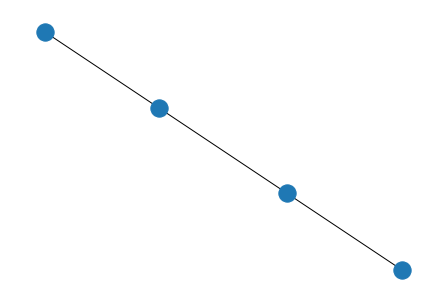

In [70]:
nx.draw(G)

# Node names

The node names don't have to be single characters -- they can be strings or integers or any immutable object, and the types can be mixed. The example below uses strings and integers for names.

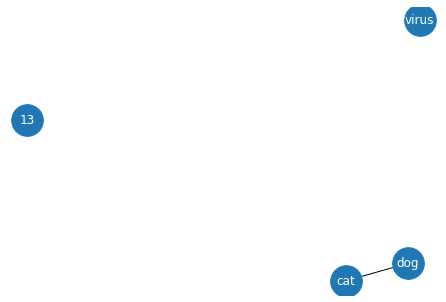

In [77]:
G = nx.Graph()

G.add_nodes_from(['cat','dog','virus',13])

G.add_edge('cat','dog')

nx.draw(G, with_labels=True, font_color='white', node_size=1000)

# Adjacency lists

One compact way to represent a graph is an adjacency list. This is most useful for unweighted graphs, directed or undirected. In an adjacency list, each line contains some number of node names. The first node name is the "source" and each other node name on the line is a "target". For instance, given the following adjacency list:
```
a d e
b c
c
d
e
```
the edges are as follows:
```
(a, d)
(a, e)
(b, c)
```
The nodes on their own line exist so that we are sure to include any singleton nodes. Note that if our graph is undirected, we only need to specify one direction for each edge. Importantly, whether the graph is directed or undirected is often not contained in the file itself -- you have to infer it. This is one limitation of the format.

In the `datasets` directory, there is a file called `friends.adjlist`. It's a plain text file, so you can open it on your computer or in GitHub, but here are its contents:

In [78]:
print(open('datasets/friends.adjlist').read())

George Frank Dennis
Dennis Claire Esther
Claire Frank Alice Esther
Bob Alice
Frank Alice
Alice
Esther
Shelly



NetworkX provides a way to read a graph from an adjacency list: `nx.read_adjlist()`. We will name this graph SG, for social graph.

In [80]:
SG = nx.read_adjlist('datasets/friends.adjlist')

We know how to draw this graph:

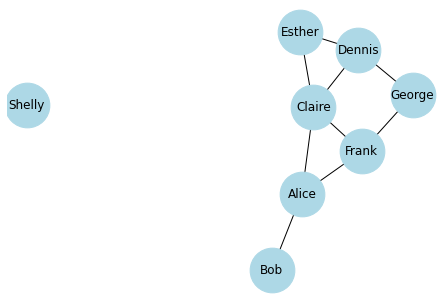

In [86]:
nx.draw(SG, node_size=2000, node_color='lightblue', with_labels=True)

And we know how to get information such as the number of friends linked from a node:

In [87]:
SG.degree('Alice')

3

# Directed graphs

Unless otherwise specified, we assume graph edges are undirected -- they are symmetric and go both ways. But some relationships, e.g. predator-prey relationships, are asymmetric and best represented as directed graphs. NetworkX provides the `DiGraph` class for directed graphs.

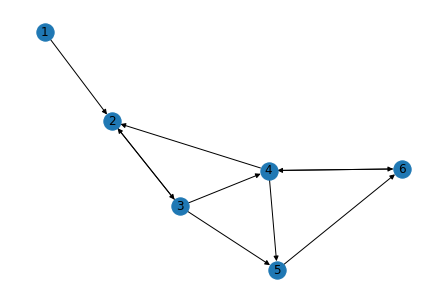

In [91]:
D = nx.DiGraph()

D.add_edges_from([(1,2),(2,3),(3,2),(3,4),(3,5),(4,5),(4,6),(5,6),(6,4),(4,2)])

nx.draw(D, with_labels=True)

Note the asymmetry in graph methods dealing with edges such as `has_edge()`:

In [92]:
D.has_edge(1,2)

True

In [93]:
D.has_edge(2,1)

False

Instead of the symmetric relationship "neighbors", nodes in directed graphs have predecessors ("in-neighbors") and successors ("out-neighbors"):

In [94]:
print('Successors of 2:', list(D.successors(2)))

print('Predecessors of 2:', list(D.predecessors(2)))

Successors of 2: [3]
Predecessors of 2: [1, 3, 4]


Directed graphs have in-degree and out-degree, giving the number of edges pointing to and from the given node, respectively:

In [95]:
D.in_degree(2)

3

In [96]:
D.out_degree(2)

1

# Create a network from Reddit data

In [99]:
import os
import praw
import json

In [100]:
os.getcwd()

'/home/sukayna/Drive/PhD/courses/sds_komex_tutorial/tutorials/day4'

In [104]:
with open(r"/home/sukayna/Drive/PhD/my_vault/api_keys/reddit_keys.json") as f: # replace with the path to your keys
    reddit_config = json.load(f)

In [105]:
reddit = praw.Reddit(
    client_id=reddit_config['client_id'],
    client_secret=reddit_config['client_secret'],
    user_agent=reddit_config['user_agent']
)

We'll construct a network graph based on user interactions. We'll create nodes for each user and edges between users who have replied to each other:

In [153]:
subreddit = reddit.subreddit("harvard") # let's pick a smallish subreddit
comments = subreddit.comments(limit=20)  # Fetching 20 comments from different posts

In [154]:
G = nx.DiGraph()

for comment in comments:
    parent_author = comment.parent().author
    if parent_author:
        G.add_edge(comment.author.name, parent_author.name) # note the direction. The arrow points to the parent

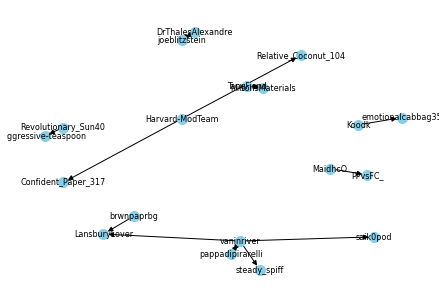

In [156]:
# let's visuaize it
nx.draw(G, with_labels=True, node_size=100, node_color='skyblue', font_size=8)

### Constructing all comments on one particular post 

In [152]:
# multi-hop data collection
posts = list(reddit.subreddit('harvard').search('COVID-19', limit=5))
link = posts[0].permalink
submission = reddit.submission(url='https://www.reddit.com' + link)
'https://www.reddit.com' + link

'https://www.reddit.com/r/Harvard/comments/ilf8g1/syracuse_coach_jim_boeheim_calls_ivy_league_silly/'

In [157]:
# Fetch all comments and replace more if there are any
submission.comments.replace_more(limit=None)
len(submission.comments)

2

In [158]:
submission.comments.list()[0].body

"Sorry they're trying to keep your son and everyone else alive, Jim"

In [159]:
submission.comments.list()[0].author

Redditor(name='pinkstardust007')

In [160]:
# get the parent comment
submission.comments.list()[0].parent().author

Redditor(name='StandTall29')

In [161]:
G = nx.DiGraph()

In [162]:
# Iterate through all comments
for comment in submission.comments.list()[:1]: # the [:1] that we only look at the first comment's thread
    # Get the author of the comment
    commenter = comment.author
    if commenter:
        # Add the commenter as a node to the graph
        G.add_node(commenter.name)
        
        # Get the parent comment (if any) and add an edge between the parent commenter and the current commenter
        parent_comment = comment.parent()
        if parent_comment.author:
            parent_commenter = parent_comment.author.name
            G.add_edge(commenter.name, parent_commenter)

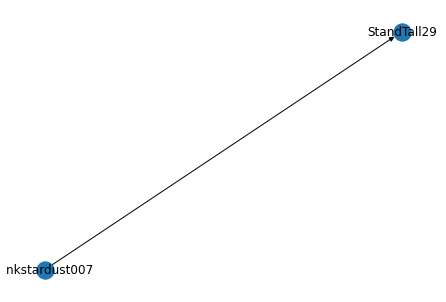

In [163]:
nx.draw(G, with_labels = True)

Let's try more than one comment now.

In [182]:
G = nx.DiGraph()

In [183]:
# Fetch all comments and replace more if there are any
submission.comments.replace_more(limit=None)

# Iterate through all comments
for comment in submission.comments.list(): # now let's look at the first 5 comments in the post
    # Get the author of the comment
    commenter = comment.author
    if commenter:
        # Add the commenter as a node to the graph
        G.add_node(commenter.name)
        
        # Get the parent comment (if any) and add an edge between the parent commenter and the current commenter
        parent_comment = comment.parent()
        if parent_comment.author:
            parent_commenter = parent_comment.author.name
            G.add_edge(commenter.name, parent_commenter)

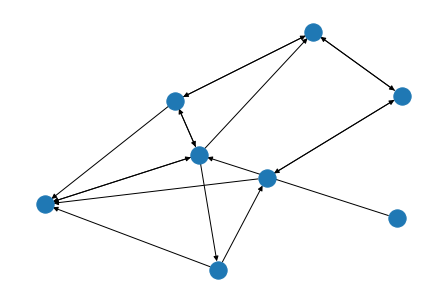

In [184]:
nx.draw(G)

In [185]:
len(G.nodes()), len(G.edges())

(8, 17)

In [207]:
# let's check the isolated nodes
for node in G.nodes():
    if G.out_degree(node) == 0 and G.in_degree(node) == 0:
        print(node)

# note: for harvard case, none but for cornell where more

In [189]:
for comment in submission.comments.list():
    if comment.author == 'pinkstardust007':
        print('https://www.reddit.com' + comment.parent().permalink)

https://www.reddit.com/r/Harvard/comments/ilf8g1/syracuse_coach_jim_boeheim_calls_ivy_league_silly/
https://www.reddit.com/r/Harvard/comments/ilf8g1/syracuse_coach_jim_boeheim_calls_ivy_league_silly/g3ro85v/


In [190]:
# let's only keep 'active' commenters or people have at least 2 comments
outdeg = dict(G.out_degree())
len(outdeg)

8

In [191]:
to_remove = [n for n in outdeg if outdeg[n] < 2] # nodes to be removed
len(to_remove)

2

In [192]:
# now remove these
G.remove_nodes_from(to_remove)

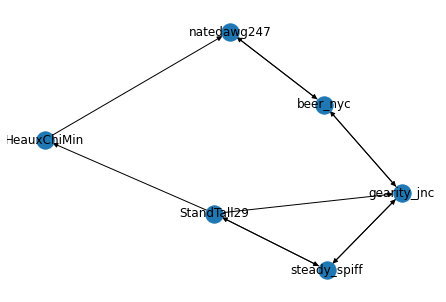

In [193]:
nx.draw(G, with_labels = True)

# Data Formats in NetworkX

NetworkX is quite versatily in terms of the data formats for reading and writing graphs. YOu can find out more here: https://networkx.org/documentation/stable/reference/readwrite/index.html

We will look at the following:
- json
- adjlist
- gfx

### JSON

In [196]:
# save
json.dump(dict(nodes=[n for n in G.nodes()],
                   edges=[[u, v] for u,v in G.edges()]),
     open('harvard_comments.json', 'w'), indent=2)

In [197]:
# load
G = nx.DiGraph()
d = json.load(open('harvard_comments.json'))
G.add_nodes_from(d['nodes'])
G.add_edges_from(d['edges'])

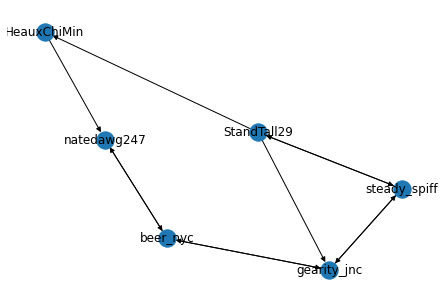

In [198]:
nx.draw(G, with_labels = True)

### Adjlist

In [199]:
# write
nx.write_adjlist(G, "harvard_comments.adjlist")

In [200]:
# read
G = nx.read_adjlist("harvard_comments.adjlist") # this is undirected

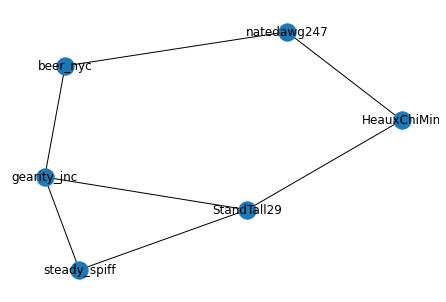

In [201]:
nx.draw(G, with_labels = True)

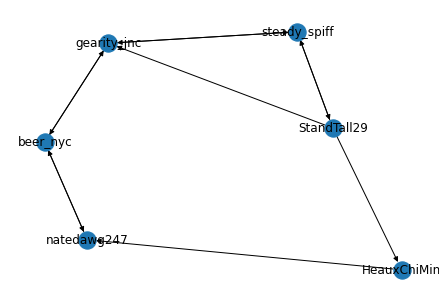

In [202]:
# read
G = nx.read_adjlist("harvard_comments.adjlist", create_using=nx.DiGraph()) # this is directed
nx.draw(G, with_labels = True)

### GEXF

GEXF (Graph Exchange XML Format) is a language for describing complex networks structures, their associated data and dynamics. read more about it here: http://gexf.net/

In [203]:
# write
nx.write_gexf(G, "harvard_comments.gexf")

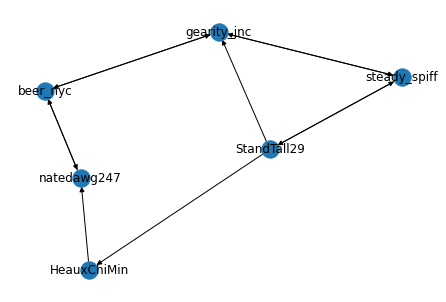

In [204]:
# read
G = nx.read_gexf("harvard_comments.gexf")
nx.draw(G, with_labels = True)

In [205]:
# END OF CODE

### Notes
Solutions for dealing with isolates in social media data which might be replies to deleted users: If you want to save the data from current to future then you can run a webscrawler on the data at frequent intervals (hourly/daily) to store data that might be prone to deletion